In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score

In [ ]:
df=pd.read_csv('train_data.csv')
df




,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30591,13894,Technology,region_2,Bachelor's,f,other,1.0,46.0,5.0,13.0,1.0,0.0,81.0,0.0
30592,31921,Operations,region_11,Master's & above,m,sourcing,1.0,45.0,2.0,18.0,1.0,0.0,57.0,0.0
30593,69703,Technology,region_27,Bachelor's,m,other,1.0,41.0,2.0,6.0,0.0,0.0,77.0,0.0
30594,39524,Sales & Marketing,region_22,Bachelor's,m,other,1.0,42.0,1.0,6.0,1.0,1.0,47.0,0.0


In [ ]:
df.info


<bound method DataFrame.info of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
30591        13894         Technology   region_2        Bachelor's      f   
30592        31921         Operations  region_11  Master's & above      m   
30593        69703         Technology  region_27        Bachelor's      m   
30594        39524  Sales & Marketing  region_22        Bachelor's      m   
30595        70200  Sales & Marketing  region_23  Master's & above      m   

      recruitment_channel  no_of_trainings   age  previous_year_rating  \
0                sourcing              1.0  35.0                   5.0   
1                   other              1.0  30.0                   5.0   
2                sourcing              1.0  34.0                   3.0   
3                   other              2.0  39.0                   1.0   
4                   other              1.0  45.0                   3.0   
...                   ...              ...   ...                   ...   
30591               other              1.0  46.0                   5.0   
30592            sourcing              1.0  45.0                   2.0   
30593               other              1.0  41.0                   2.0   
30594               other              1.0  42.0                   1.0   
30595                sour              NaN   NaN                   NaN   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                    8.0            1.0          0.0                49.0   
1                    4.0            0.0          0.0                60.0   
2                    7.0            0.0          0.0                50.0   
3                   10.0            0.0          0.0                50.0   
4                    2.0            0.0          0.0                73.0   
...                  ...            ...          ...                 ...   
30591               13.0            1.0          0.0                81.0   
30592               18.0            1.0          0.0                57.0   
30593                6.0            0.0          0.0                77.0   
30594                6.0            1.0          1.0                47.0   
30595                NaN            NaN          NaN                 NaN   

       is_promoted  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
30591          0.0  
30592          0.0  
30593          0.0  
30594          0.0  
30595          NaN  

[30596 rows x 14 columns]>

In [ ]:
df.shape


(30596, 14)

In [ ]:
#numerical values

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)


['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [ ]:
#catagorical values

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)


['department', 'region', 'education', 'gender', 'recruitment_channel']


In [ ]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1385
gender,0
recruitment_channel,0
no_of_trainings,1
age,1
previous_year_rating,2324
length_of_service,1


In [ ]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,1385
gender,0
recruitment_channel,0
no_of_trainings,1
age,1
previous_year_rating,2324
length_of_service,1


In [ ]:
df3=df.copy()
df3

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30591,13894,Technology,region_2,Bachelor's,f,other,1.0,46.0,5.0,13.0,1.0,0.0,81.0,0.0
30592,31921,Operations,region_11,Master's & above,m,sourcing,1.0,45.0,2.0,18.0,1.0,0.0,57.0,0.0
30593,69703,Technology,region_27,Bachelor's,m,other,1.0,41.0,2.0,6.0,0.0,0.0,77.0,0.0
30594,39524,Sales & Marketing,region_22,Bachelor's,m,other,1.0,42.0,1.0,6.0,1.0,1.0,47.0,0.0


In [ ]:
# label encode education column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df3['education'] = le.fit_transform(df3['education'])
df3['education'].unique()

array([2, 0, 3, 1])

In [ ]:
#imputation


for column in numerical_features:
  df3[column].fillna(df3[column].mean(), inplace=True)


for column in categorical_features:
  df3[column].fillna(df3[column].mode()[0], inplace=True)

df3.isnull().sum()

<ipython-input-11-9907cde074a7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[column].fillna(df3[column].mean(), inplace=True)
<ipython-input-11-9907cde074a7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [ ]:
#view duplicate
df.duplicated().sum()

0

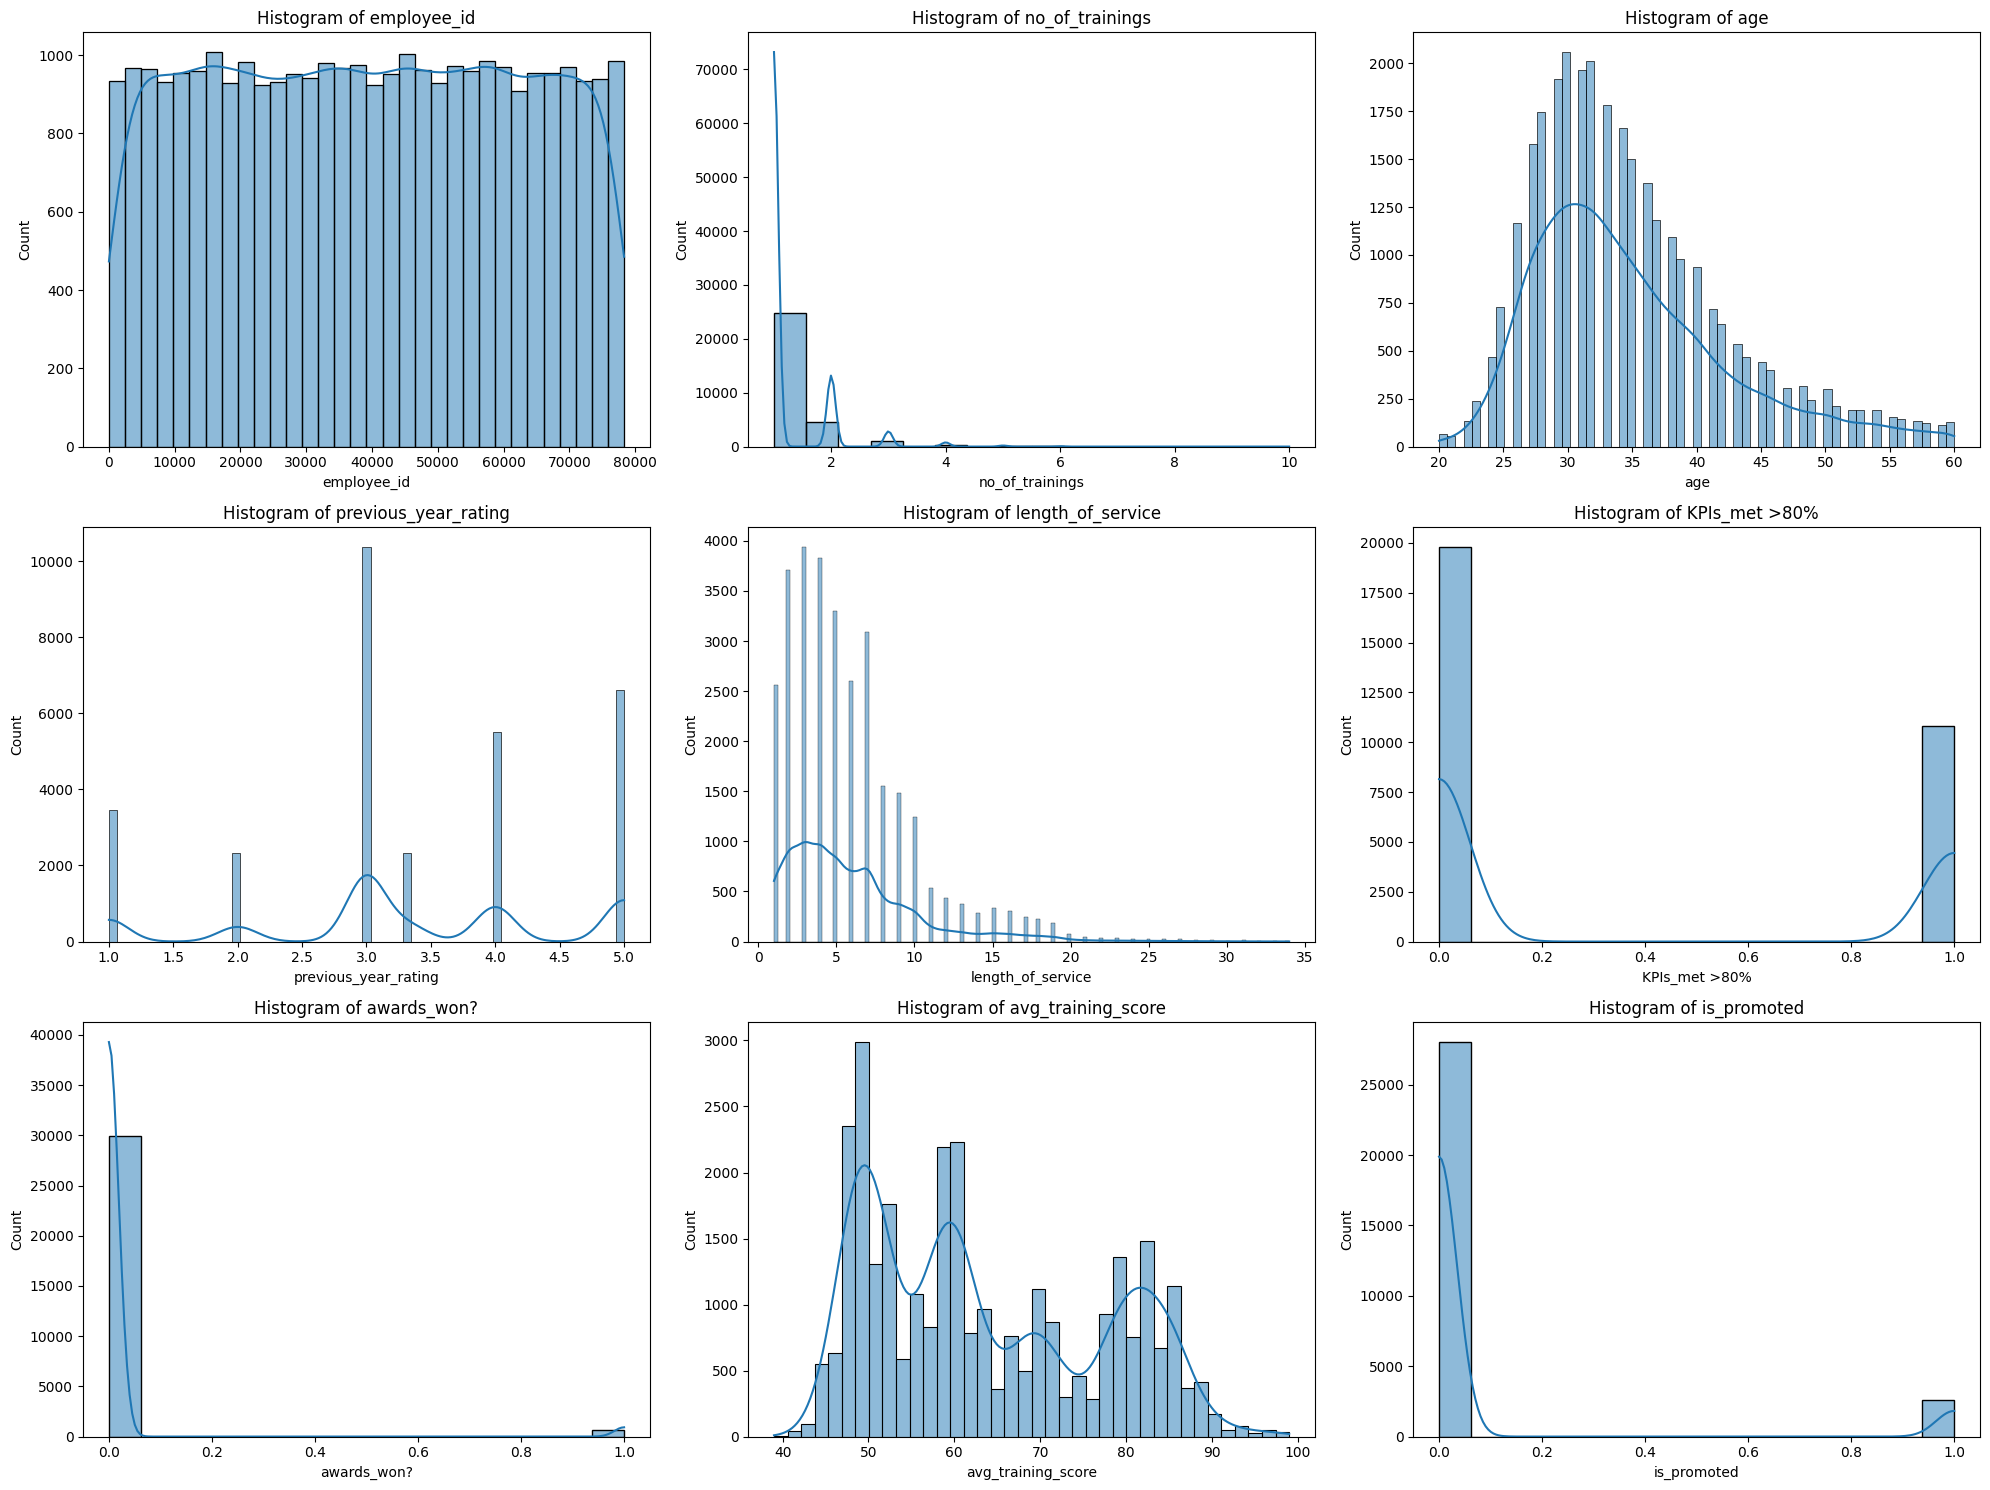

In [ ]:

# Plotting histograms for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df3[col], kde=True)  # Use df3, not df
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

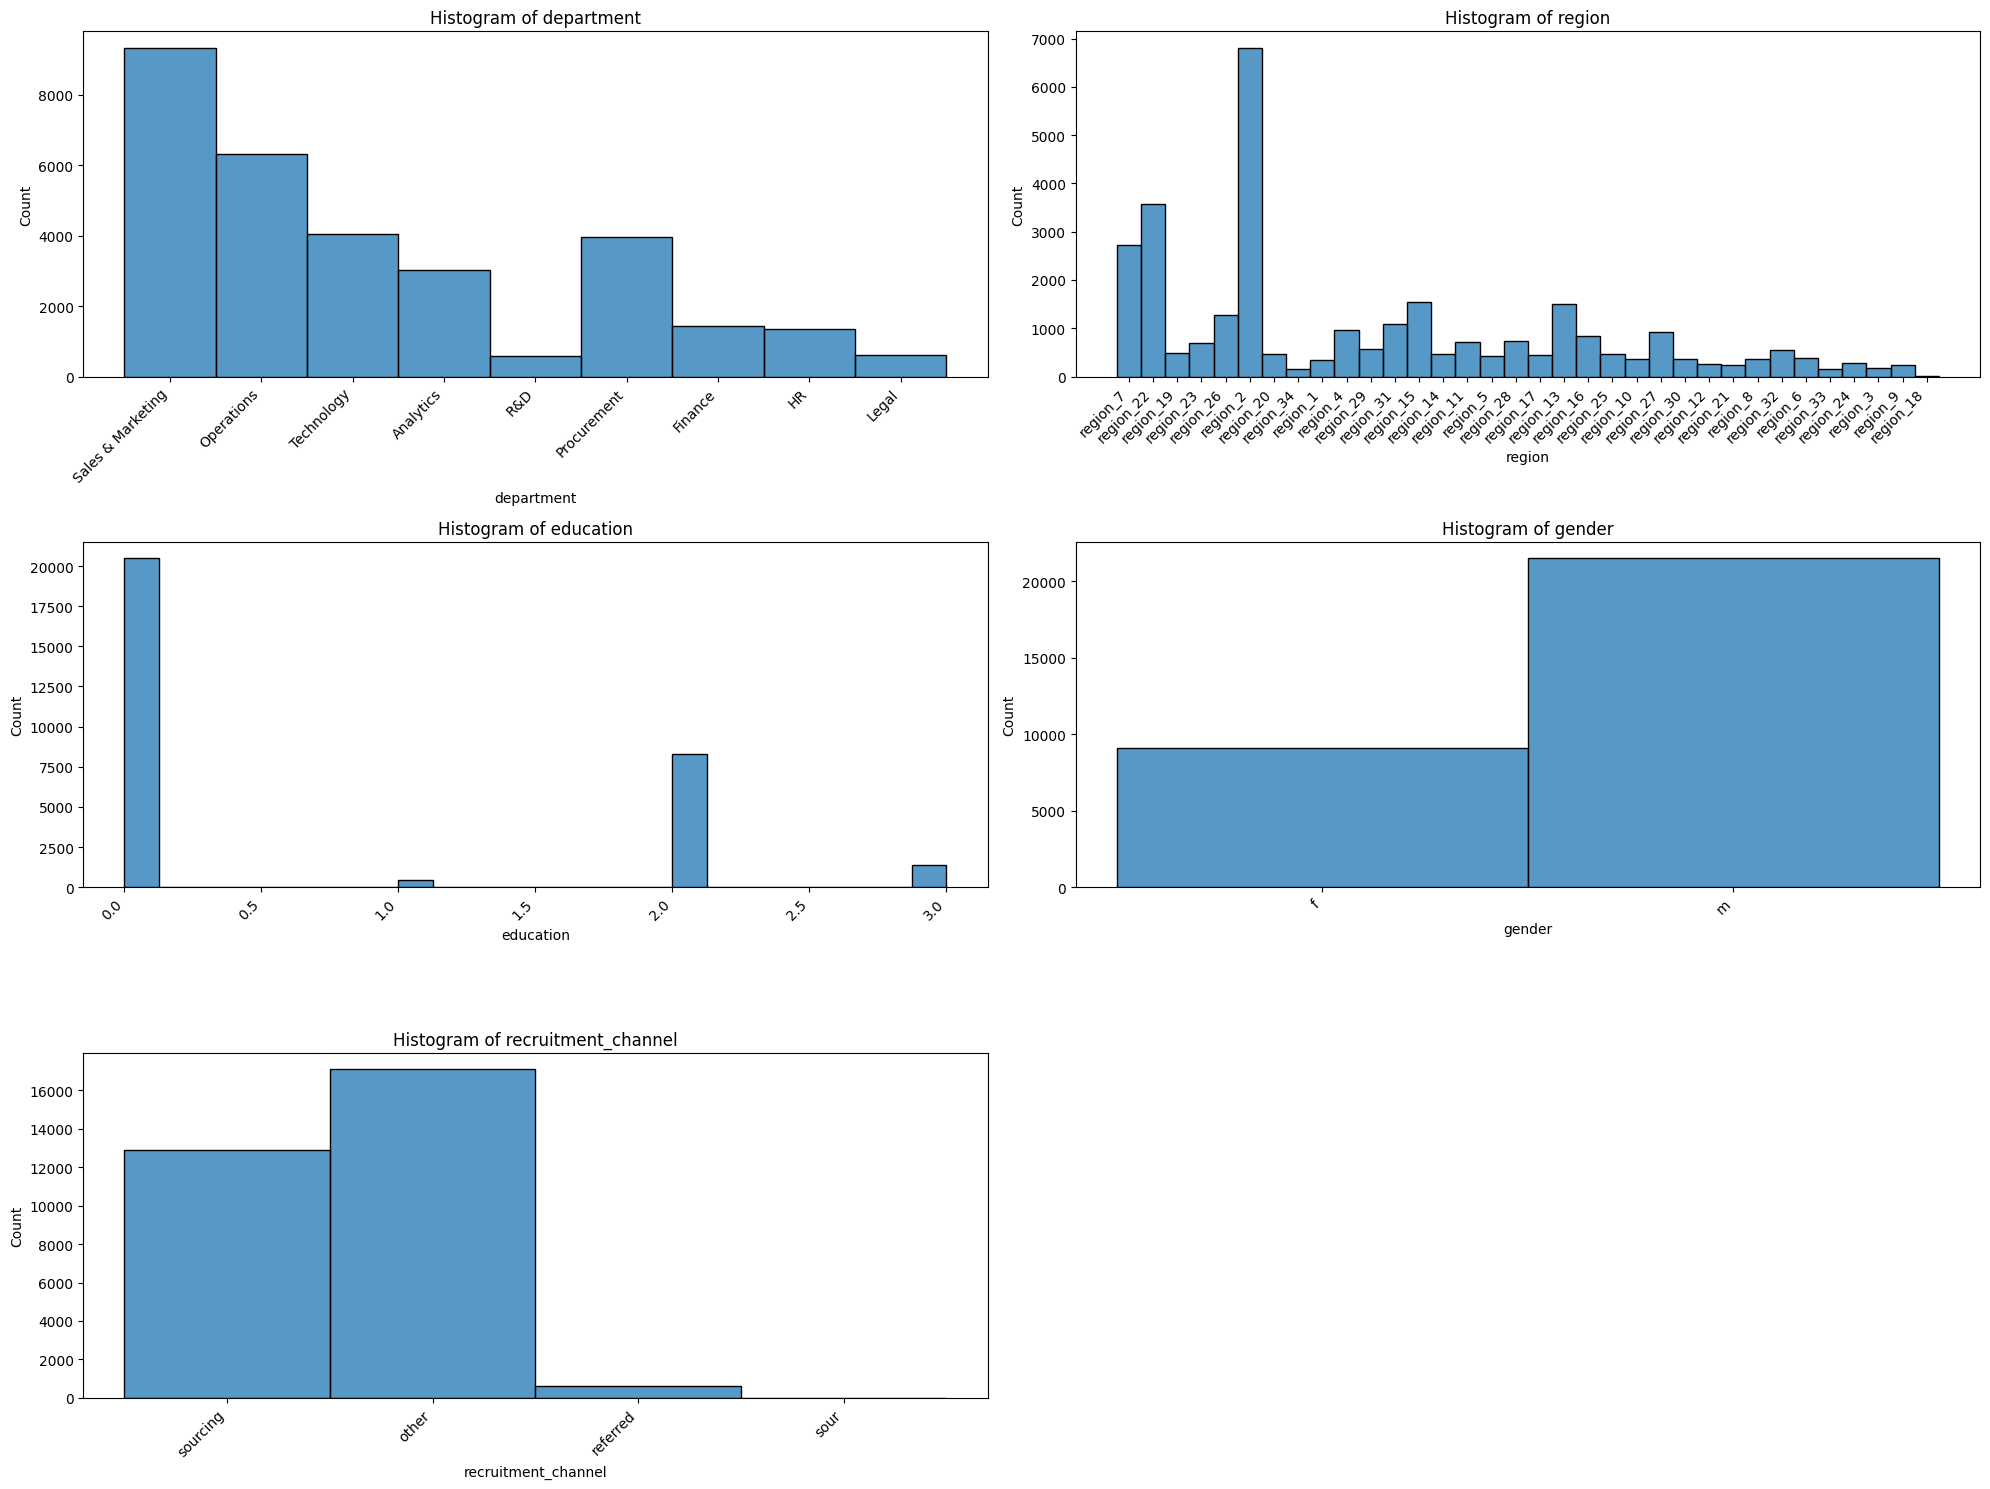

In [ ]:


# Plotting histograms for categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)  # Adjust subplot grid if needed
    sns.histplot(df3[col])  # Use df3, not df
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#  string into float  'Sales & Marketing'

import pandas as pd
data = {'column_name': ['Sales & Marketing', '10.5', '20']}
df = pd.DataFrame(data)
def convert_to_float(value):
  try:
    return float(value)
  except ValueError:
    return np.nan  # or some other default value

df['column_name'] = df['column_name'].apply(convert_to_float)
df

,column_name
0,NaN
1,10.5
2,20.0


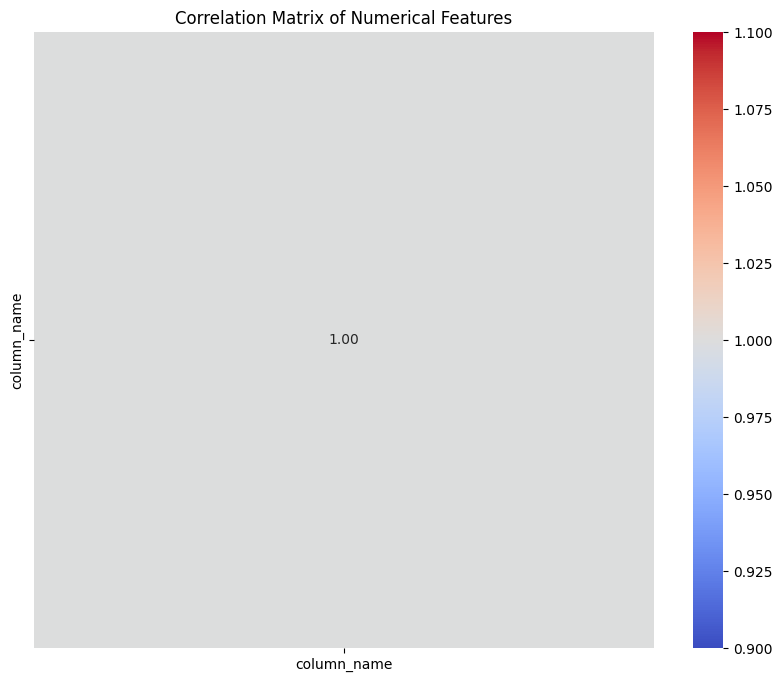

In [ ]:


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:


for column in numerical_features:
    if df3[column].isnull().any():  # Check if the column has missing values
        df3[column].fillna(df3[column].mean(), inplace=True)


for column in categorical_features:
    if df3[column].isnull().any():  # Check if the column has missing values
        df3[column].fillna(df3[column].mode()[0], inplace=True)


In [ ]:
# prompt: split train and test data on this train data set

# Assuming 'df3' is your preprocessed DataFrame
X = df3.drop('is_promoted', axis=1)  # Replace 'target_column' with the actual name of your target variable column
y = df3['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

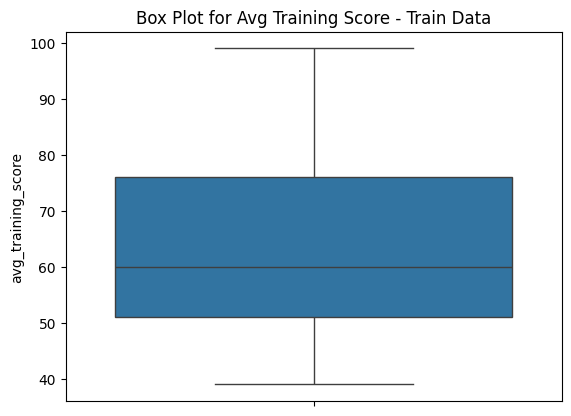

In [ ]:
# Box plot for avg_training_score in train data
sns.boxplot(df3['avg_training_score'])
plt.title('Box Plot for Avg Training Score - Train Data')
plt.show()



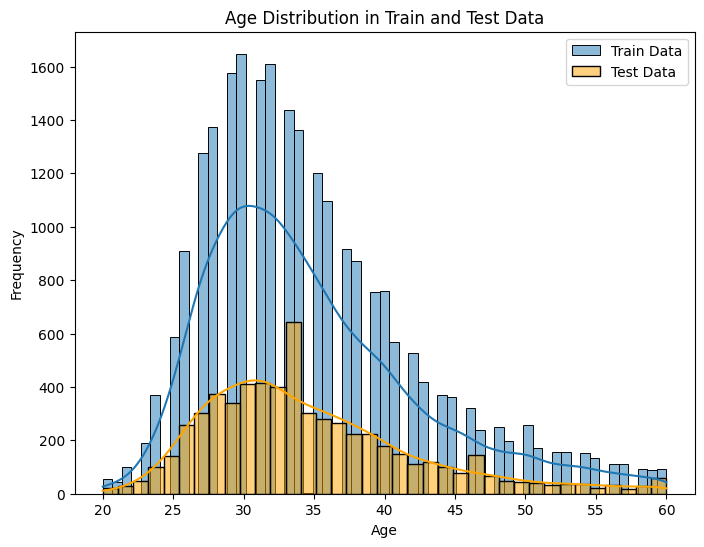

In [ ]:
# prompt: C

# Assuming X_train and X_test are your training and testing DataFrames
plt.figure(figsize=(8, 6))
sns.histplot(X_train['age'], label='Train Data', kde=True)
sns.histplot(X_test['age'], label='Test Data', kde=True, color='orange')
plt.title('Age Distribution in Train and Test Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# prompt: apply linear regression

# Assuming 'df3' is your preprocessed DataFrame
X = df3.drop('is_promoted', axis=1)  # Features
y = df3['is_promoted']  # Target variable

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.056519695882333965
R-squared: 0.22832585717732978


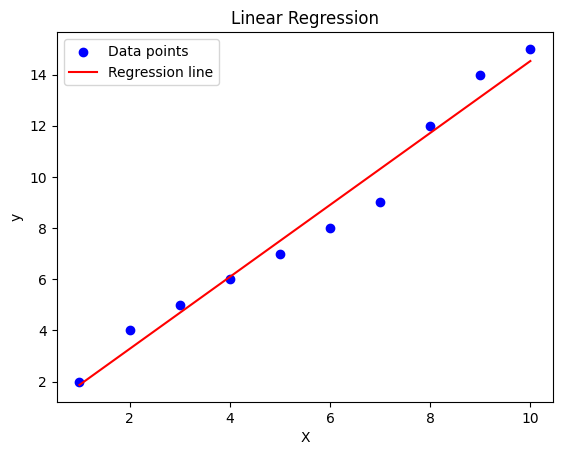

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 5, 6, 7, 8, 9, 12, 14, 15])

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:
# prompt: apply decision tree

from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Initialize and train the decision tree model
tree_model = DecisionTreeRegressor(random_state=42) # Use DecisionTreeRegressor
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model - You might need a different metric for regression
# For example, you could use mean squared error or R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Mean Squared Error: {mse}")
print(f"Decision Tree R-squared: {r2}")

Decision Tree Mean Squared Error: 0.10016339869281046
Decision Tree R-squared: -0.36754990666252096


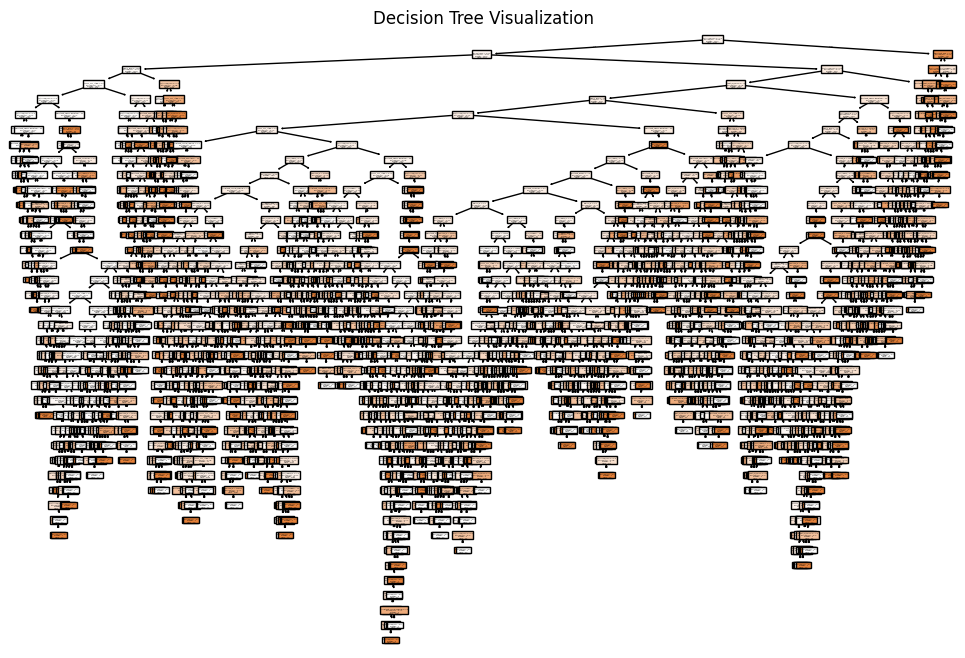

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming X_train contains the DataFrame with feature names as columns
feature_names = X_train.columns

# Assuming y_train contains the target variable with 0 and 1 as class labels
class_names = ['Not Promoted', 'Promoted']

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=feature_names, class_names=class_names, filled=True)  # Use tree_model instead of model
plt.title("Decision Tree Visualization")
plt.show()

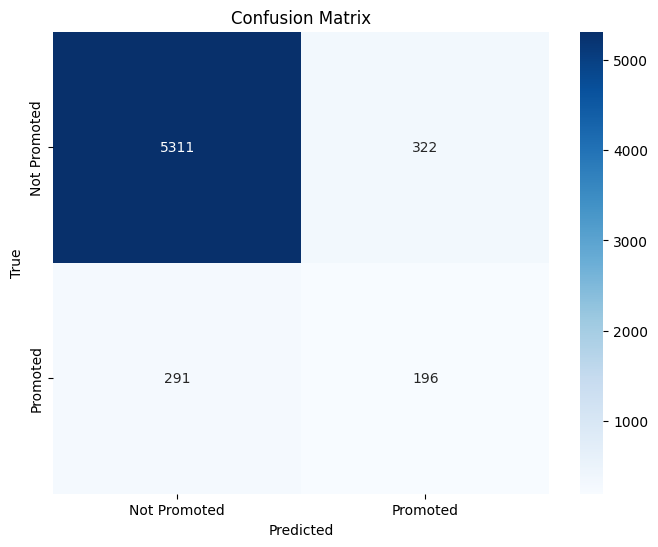

Decision Tree F1 Score: 0.3900497512437811


In [ ]:
# prompt: evaluate f1score,confusion matrics

from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_tree are defined from the previous code
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_tree)
print(f"Decision Tree F1 Score: {f1}")

In [ ]:
# prompt: apply random forest

from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor for Regression
from sklearn.metrics import mean_squared_error, r2_score  # Import appropriate metrics

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)  # Use RandomForestRegressor
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using regression metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest Mean Squared Error: 0.05098131827172164
Random Forest R-squared: 0.30394237861429974


Random Forest Mean Squared Error: 0.05098131827172164
Random Forest R-squared: 0.30394237861429974


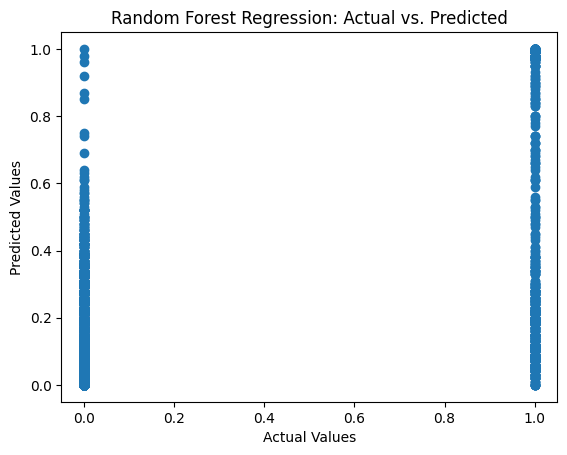

In [ ]:
# prompt: evaluate using regression metrics

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_rf are defined from your RandomForestRegressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# Optionally, you can visualize the predicted vs. actual values
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs. Predicted")
plt.show()

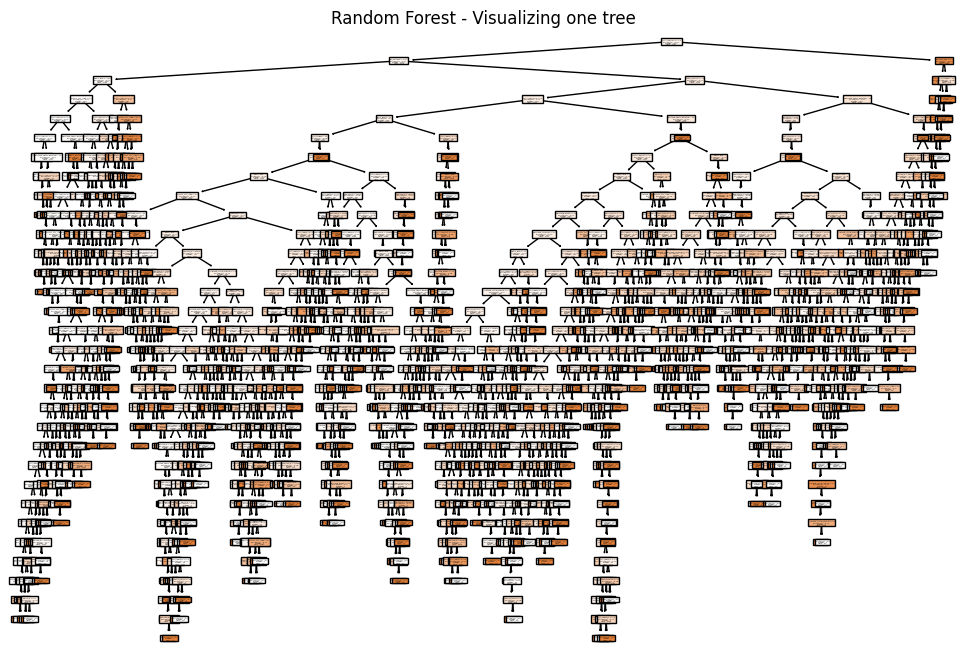

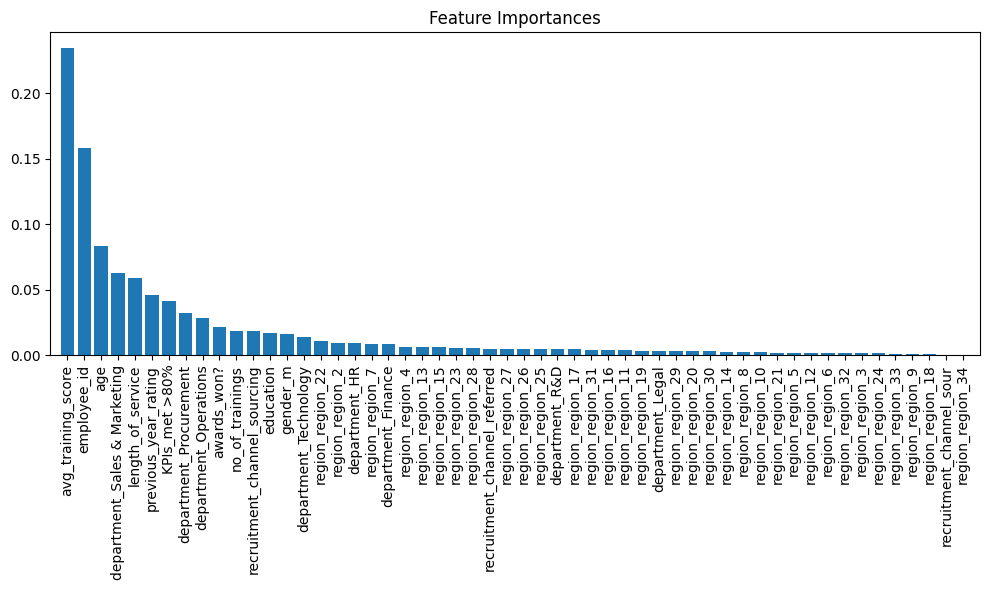

In [ ]:

# Assuming X_train contains the DataFrame with feature names as columns
feature_names = X_train.columns

# Assuming y_train contains the target variable with 0 and 1 as class labels
class_names = ['Not Promoted', 'Promoted']

# Plot the Random Forest (you can only visualize individual trees)
# Choose a tree from the forest (e.g., the first one)
estimator = rf_model.estimators_[0]

plt.figure(figsize=(12, 8))
plot_tree(estimator, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Random Forest - Visualizing one tree")
plt.show()

# Feature Importance plot for the Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
data=pd.read_csv('test_data.csv')
data


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [ ]:
# prompt: hyper tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example using GridSearchCV with RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)


print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Mean Squared Error: {mse_best_rf}")
print(f"Best Random Forest R-squared: {r2_best_rf}")


# Example using RandomizedSearchCV (for larger parameter grids)
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],  # Wider range
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']  # Added max_features
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print("Best hyperparameters (RandomizedSearch):", random_search.best_params_)
print("Best score (RandomizedSearch):", random_search.best_score_)

best_rf_model_random = random_search.best_estimator_
y_pred_best_rf_random = best_rf_model_random.predict(X_test)

# Evaluate the best model
mse_best_rf_random = mean_squared_error(y_test, y_pred_best_rf_random)
r2_best_rf_random = r2_score(y_test, y_pred_best_rf_random)

print(f"Best Random Forest Mean Squared Error (RandomizedSearch): {mse_best_rf_random}")
print(f"Best Random Forest R-squared (RandomizedSearch): {r2_best_rf_random}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.3s
[CV] END max_dep

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best hyperparameters (RandomizedSearch): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best score (RandomizedSearch): -0.056248682312463605
Best Random Forest Mean Squared Error (RandomizedSearch): 0.052736367363993925
Best Random Forest R-squared (RandomizedSearch): 0.2799803600162091


In [ ]:
data=pd.read_csv('test_data.csv')
data


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [ ]:
data.shape


(23490, 13)

In [ ]:
data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [ ]:
# Check for missing values and data types
print("Test Data Missing Values:\n", data.isnull().sum())
print("Test Data Types:\n", data.dtypes)

Test Data Missing Values:
 employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64
Test Data Types:
 employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


In [ ]:
print("Unique values in categorical columns:\n")
print(data['department'].unique())
print(data['region'].unique())
print(data['education'].unique())
print(data['gender'].unique())

Unique values in categorical columns:

['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']
["Bachelor's" "Master's & above" nan 'Below Secondary']
['m' 'f']


In [ ]:
# prompt: impute missing values
import pandas as pd
from sklearn.impute import SimpleImputer

# Ensure 'is_promoted' is not in numerical_features if it's not in df4
numerical_features = [col for col in numerical_features if col in df4.columns]

# Impute missing values in numerical features using the mean
for column in numerical_features:
    imputer = SimpleImputer(strategy='mean')
    # Reshape the output to a 1D array
    data[column] = imputer.fit_transform(data[[column]]).ravel()

# Impute missing values in categorical features using the most frequent value
for column in categorical_features:
    imputer = SimpleImputer(strategy='most_frequent')
    # Reshape the output to a 1D array
    data[column] = imputer.fit_transform(data[[column]]).ravel()

In [ ]:
data = pd.get_dummies(data, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'length_of_service', 'avg_training_score']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
# outliers


numerical_features_data= data.select_dtypes(include=np.number).columns.tolist()

# Calculate IQR for each numerical feature
for col in numerical_features_data:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Print or handle outliers as needed
    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

No outliers found in employee_id
No outliers found in education
Outliers in no_of_trainings:
       employee_id  education  no_of_trainings       age  \
3          38562.0          0              3.0 -0.492612   
7          67269.0          0              2.0  0.158487   
10         60245.0          0              2.0  0.679366   
30         72407.0          0              2.0 -0.101953   
31         65237.0          0              2.0  1.070025   
...            ...        ...              ...       ...   
23479      39410.0          0              3.0 -1.925029   
23481      78278.0          0              2.0  0.679366   
23482      27284.0          0              2.0  1.200244   
23488       1186.0          0              3.0 -1.013491   
23489       5973.0          0              3.0  0.679366   

       previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
3                  2.000000           0.758019            0.0          0.0   
7                  3.000000   

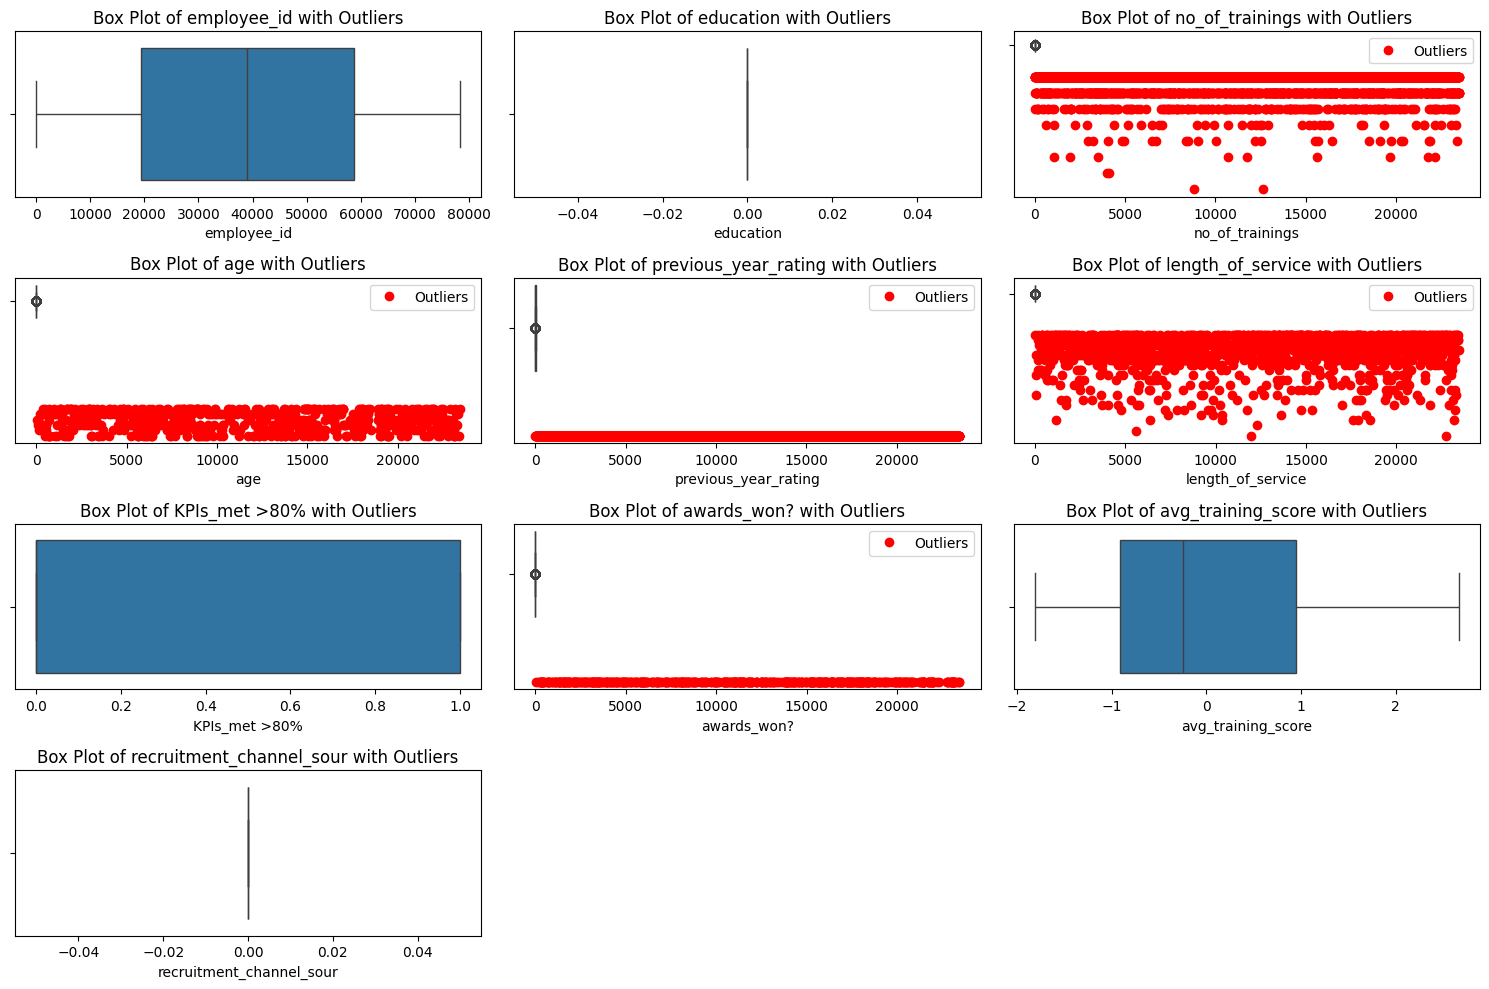

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

# Calculate the number of rows and columns needed for subplots
num_cols = len(numerical_features_data)
num_rows = int(np.ceil(num_cols / 3))  # Calculate rows to accommodate all columns

# Iterate and create subplots
for i, col in enumerate(numerical_features_data):
    plt.subplot(num_rows, 3, i + 1)  # Adjust subplot grid dynamically

    # Calculate IQR for each numerical feature
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Plot the data with outliers highlighted
    sns.boxplot(x=data[col])

    # Highlight outlier points in red
    if not outliers.empty:
        plt.plot(outliers.index, outliers[col], 'ro', label='Outliers')
        plt.legend()

    plt.title(f'Box Plot of {col} with Outliers')

plt.tight_layout()
plt.show()

In [ ]:


# Identify outliers in numerical features of df4 and handle them (e.g., capping or removal).

def handle_outliers(df, column, method='capping'):
    """Handles outliers in a given column of a DataFrame.

    Args:
        df: The input DataFrame.
        column: The column name to process.
        method: The method to use for outlier handling ('capping' or 'removal').

    Returns:
        The DataFrame with outliers handled.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'capping':
        df[column] = np.clip(df[column], lower_bound, upper_bound)
    elif method == 'removal':
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        raise ValueError("Invalid outlier handling method.")

    return df


# Example usage: capping outliers in 'age', 'length_of_service', and 'avg_training_score'
for col in ['age', 'length_of_service', 'avg_training_score']:
    data = handle_outliers(data, col, method='capping') # Or method='removal'

# Now df4 has outliers capped or removed.  Choose the method carefully!

In [114]:
# prompt: make prediction eithrer 1 or 0 is_promoted to  the test data

# Assuming 'best_rf_model_random' is your best RandomForestRegressor model
# and 'data' is your preprocessed test DataFrame.

# Make sure the columns in your test data match the training data
# If there are missing columns in the test data, add them with 0 values.
# Example (replace with the actual missing columns):
missing_cols = set(X_train.columns) - set(data.columns)
for c in missing_cols:
    data[c] = 0
data = data[X_train.columns]  # Ensure the order of columns is the same

# Make predictions on the test data
y_pred_test = best_rf_model_random.predict(data)

# Convert predictions to 0 or 1 (assuming a threshold of 0.5)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

# Now y_pred_test_binary contains your predictions (0 or 1)
y_pred_test_binary

array([1, 1, 1, ..., 1, 1, 1])

In [115]:
df2=pd.read_csv('sample_submission.csv')
df2


,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [116]:
# prompt: combine the sample submission and prection to make new csv

# Create a new DataFrame with the 'employee_id' and the predicted 'is_promoted'
submission_df = pd.DataFrame({'employee_id': df2['employee_id'], 'is_promoted': y_pred_test_binary})

# Save the DataFrame to a new CSV file
submission_df.to_csv('final_submission.csv', index=False)

In [118]:
df5=pd.read_csv('final_submission.csv')
df5

,employee_id,is_promoted
0,8724,1
1,74430,1
2,72255,1
3,38562,1
4,64486,1
...,...,...
23485,53478,1
23486,25600,1
23487,45409,1
23488,1186,1


In [119]:
# prompt: download the submission

from google.colab import files
files.download('final_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>